<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-memowayun/blob/main/A01793695_Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
## *Ciencia y Analítica de Datos*


Nombre del estudiante: ***MIGUEL GUILLERMO GALINDO OROZCO***

Matrícula: ***A01793695***


---



# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.dot(np.dot(W,D),Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


**Respuesta Ejercicio 1**



---



---


$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$

In [2]:
#Matriz 1
# define la matriz
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

# calcula la eigendescomposición
eigenvalues, eigenvectors = eig(A)
print(eigenvalues) #D
print(eigenvectors) #W

# Utilizar los valores y vectores para reconstruir

W = eigenvectors
Winv = np.linalg.inv(W)
D = np.diag(eigenvalues)

#la matriz B tiene que dar igual a A
print("-------Matriz reconstruida-------")
B = np.around(np.dot(np.dot(W,D),Winv),0)
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]
-----------------------------




---



---


$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$

In [3]:
#Matriz 2

# define la matriz
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")

# calcula la eigendescomposición
eigenvalues, eigenvectors = eig(A2)
print(eigenvalues) #D
print(eigenvectors) #W

# Utilizar los valores y vectores para reconstruir

W = eigenvectors
Winv = np.linalg.inv(W)
D = np.diag(eigenvalues)

#la matriz B tiene que dar igual a A
print("-------Matriz reconstruida-------")
B = np.around(np.dot(np.dot(W,D),Winv),0)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------




---



---


$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

In [4]:
#Matriz 3

# define la matriz
A = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

# calcula la eigendescomposición
eigenvalues, eigenvectors = eig(A)
print(eigenvalues) #D
print(eigenvectors) #W

# Utilizar los valores y vectores para reconstruir

W = eigenvectors
Winv = np.linalg.inv(W)
D = np.diag(eigenvalues)

#la matriz B tiene que dar igual a A
print("-------Matriz reconstruida-------")
B = np.around(np.dot(np.dot(W,D),Winv),0)
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**Comentarios Ejercicio 1:**

Es a través de la descomposición de la matriz en sus eigenvalores y eigenvectores que podemos resumir la información contenida en la matriz, de tal forma que podamos transformarla para usarla con menores dimensiones y tratando de capturar la mayor cantidad de variabilidad (información posible). 

Con la transformacion de los eigenvalores (D) y eigenvectores (W) siguiente: 

$WDW^{-1}$

Es posible re construir la matriz inicial, demostrando que solo son transformaiciones de la información, por lo que al realizarlas, estamos conservando la información y variabilidad original. El método de reducción conserva la mayor cantidad de información perdiendo un número de dimensiones en las matrices. 


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


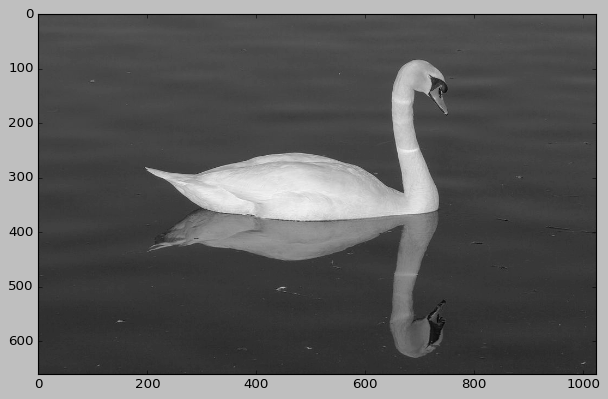

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FE5EEE356D0>


In [5]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [6]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [7]:
U.shape

(660, 660)

In [8]:
V.shape

(1024, 1024)

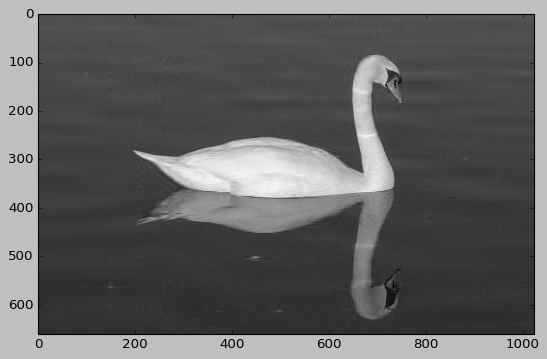

Felicidades la imagen está comprimida


In [9]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

#imagen 1

[23.  0.  0. ...  0.  0.  0.]


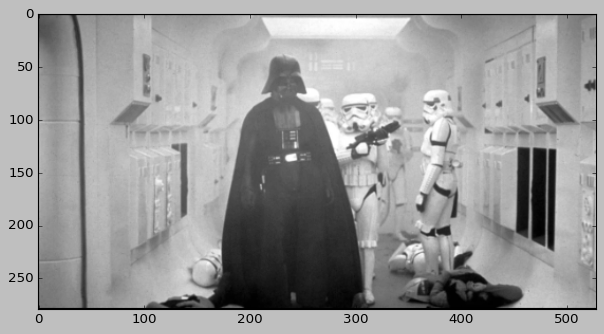

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=528x279 at 0x7FE5EA9D3C90>


In [10]:
plt.style.use('classic')
#img = Image.open(urllib.request.urlopen('https://www.clarin.com/img/2020/08/29/darth-vader-en-el-star___ZMplaD4dT_1200x630__1.jpg')).convert('LA')
img = Image.open('/content/imagenes/darth_vader.23.19.png')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [11]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(279, 528)

In [12]:
U.shape

(279, 279)

In [13]:
V.shape

(528, 528)

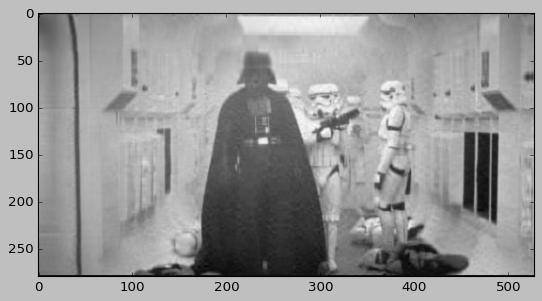

Con 45 en valor logramos entender la imagen y distinguir la mayoría de la información
Felicidades la imagen está comprimida


In [14]:
#Cuantos valores crees que son necesarios?

#iremos de 0-279, siendo 279 como normalmente están los datos

nvalue = 45
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion

plt.imshow(reconstimg,cmap='gray')
plt.show()
print('Con ' + str(nvalue) + ' en valor logramos entender la imagen y distinguir la mayoría de la información')
print("Felicidades la imagen está comprimida")

#imagen 2

[ 21.  21.  20. ... 255. 255. 255.]


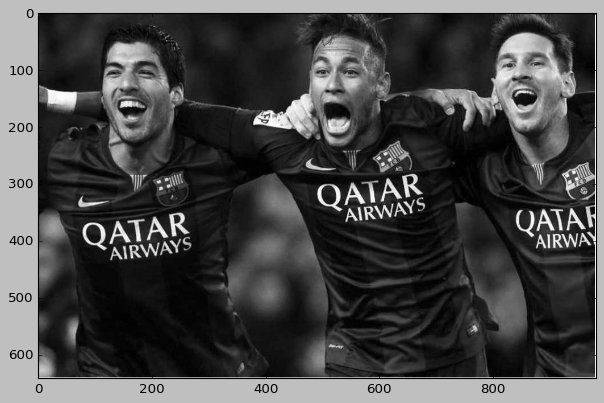

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=982x641 at 0x7FE5EEE3EB90>


In [15]:
plt.style.use('classic')
img = Image.open('/content/imagenes/MSN.33.02.png')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [16]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

print(U.shape)
print(V.shape)

(641, 641)
(982, 982)


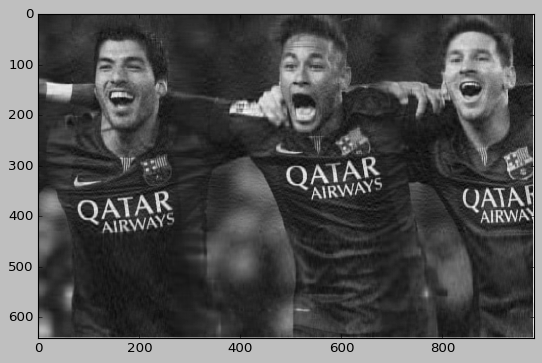

Con 64 en valor logramos entender la imagen y distinguir la mayoría de la información
Felicidades la imagen está comprimida


In [17]:
#Cuantos valores crees que son necesarios?

#iremos de 0-641, siendo 641 como normalmente están los datos

nvalue = 64
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion

plt.imshow(reconstimg,cmap='gray')
plt.show()
print('Con ' + str(nvalue) + ' en valor logramos entender la imagen y distinguir la mayoría de la información')
print("Felicidades la imagen está comprimida")

#imagen 3

[248. 247. 246. ... 204. 209. 220.]


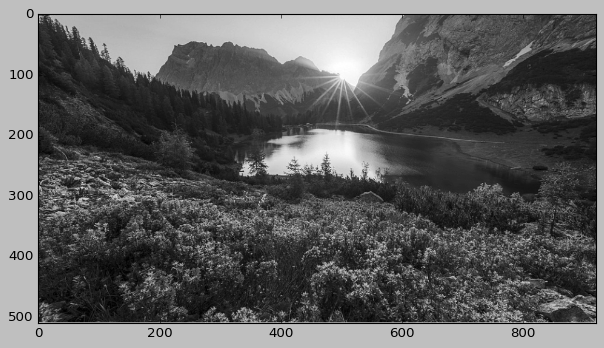

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=921x509 at 0x7FE5EA951190>


In [18]:
plt.style.use('classic')
img = Image.open('/content/imagenes/paisaje.33.12.png')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)


In [19]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

print(U.shape)
print(V.shape)

(509, 509)
(921, 921)


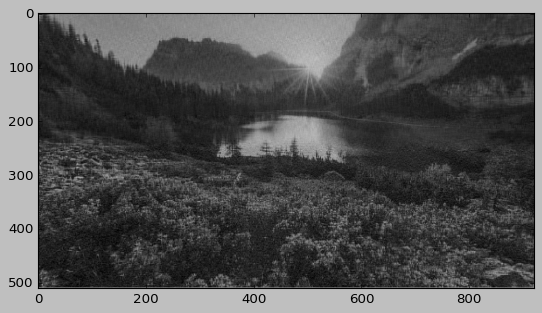

Con 85 en valor logramos entender la imagen y distinguir la mayoría de la información
Felicidades la imagen está comprimida


In [20]:
#Cuantos valores crees que son necesarios?

#iremos de 0-509, siendo 509 como normalmente están los datos

nvalue = 85
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion

plt.imshow(reconstimg,cmap='gray')
plt.show()
print('Con ' + str(nvalue) + ' en valor logramos entender la imagen y distinguir la mayoría de la información')
print("Felicidades la imagen está comprimida")

**Comentarios Ejercicio 2:**

En el ejercicio se ejemplifica la reducción de dimensiones, y como esto afecta la información que capturamos. Es decir, al disminuir el número de dimensiones que conservamos de cada imagen, disminuye la calidad y cantidad de información. Sin embargo, es posible la reducción de componentes (dimensiones) y conservar la mayor cantidad de información (o variabilidad) de tal forma que siga siendo posible distinguir la imagen y lo que se quiere transmitir de la misma. 
Este ejemplo, sirve para mostrar la importancia de reducir los componentes, y por lo tanto reducir la complejidad de la información, manteniendo lo más importante, la información que se almacena. (En este caso, en imágenes). 



# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




**Calculo de PCA**

Librerías a utilizar para tutorial

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot') ## Definir. la forma de hacer gráficas

Cargar la data

In [22]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Escalar la data

In [23]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Obtener componentes principales (2)

In [24]:
pca = PCA(n_components=2) # Sólo 2 componentes
X_new = pca.fit_transform(X) # Transformar la data al nuevo espacio generado con 2 componentes

Gráfica del antes y después del PCA

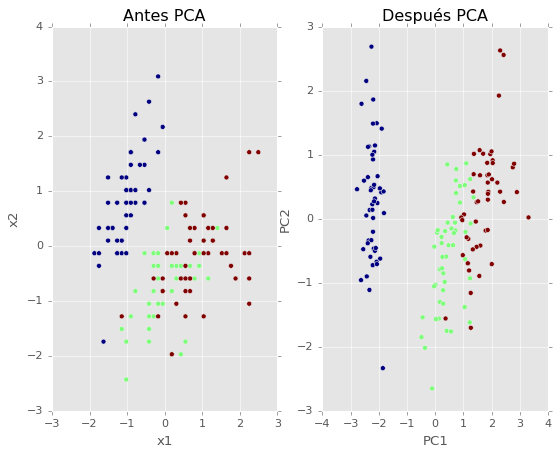

In [25]:
fig, axes = plt.subplots(1,2) # Definir gráfica 

axes[0].scatter(X[:,0], X[:,1], c=y) ## Gráfica de puntos de X1 y X2 estandarizada
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Antes PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y) ## Gráfica de puntos de PC1 y PC2
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Después PCA')
plt.show()

Obtener el total de varianza explicada con los dos componentes generados

In [26]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


**Prueba de que los eigenvalores de la matriz de covarianza (es decir, la eigendescomposición de la matriz de covarianza original) de los datos originales es igual a las varianzas de la data en con reducción de dimensionaldidad**

In [27]:
np.cov(X_new.T) ###  Eigenvalores de la matriz de covarianza origianl

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [28]:
pca.explained_variance_ ### Covarianza del espacio reducido a 2 componentes (es decir, después de PCA)

array([2.93808505, 0.9201649 ])

Observamos que la eigendescomposición de la matriz de varianza original, tomando los valores de la diagonal, es decir la varianza, es igual a la varianza en el espacio reducido. En otras palabras, es igual a los eigenvalores de la covarianza del PCA.

**Feature Importances**

In [29]:
print(abs( pca.components_ ))


[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Con lo anterior, observamos la importancia de cada feauture en cada componente. 
La primer linea refleja la importancia o peso de cada variable en el primer componente. 
y La segunda linea refleja la importancia o peso de cada variable en el segundo componente. 

A mayor magnitud, mayor importancia de la variable en el componente. 

Con esto, observamos que X1,x3, y x4 tiene una mayor importancia en PC1 

y, X2 tiene una mayor importancia en PC2

**BIPLOT**

Función que se utiliza en el tutorial

In [30]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

Manera de llamar la función para el caso en específico

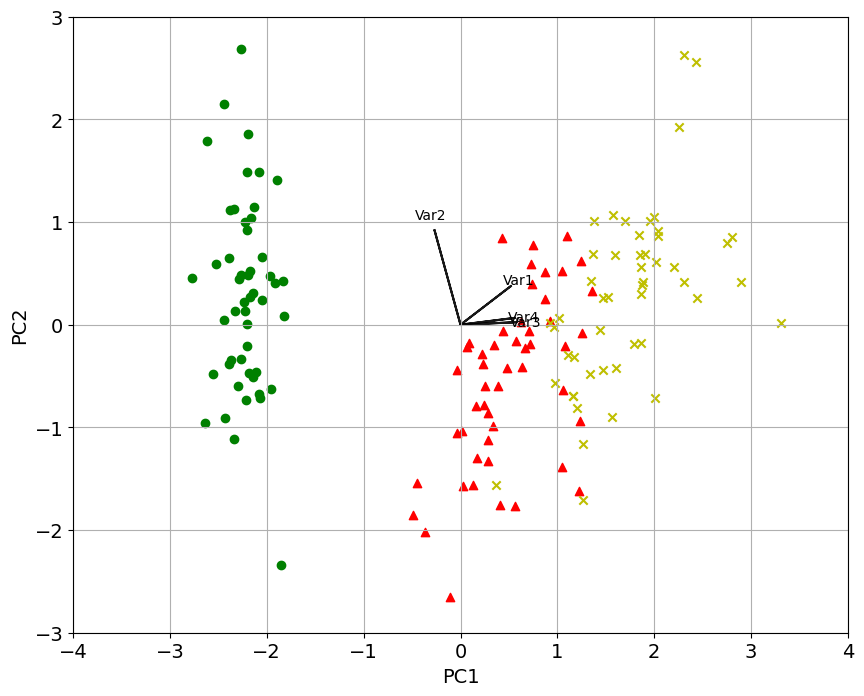

In [31]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style

# Call the biplot function for only the first 2 PCs

biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Observamos con lo anterior que, 

x1,x3,x4 determinan el comportamiento de PC1 

por otro lado, 

x2, determina el comportamineto de PC2

Lo anterior podemos demostrarlo con la correlación entre variables

Correlación entre x3, y x4

In [32]:
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

Positiva y muy cercana a 1

Por otro lado, la correlación entre x2, y x3

In [33]:
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Muestra una correlación negativa pero muy baja

**Comentarios Ejercicio 3:**




El ejercicio anterior, permite entender la forma de calcular PCA, y cómo demostrar que es una transformación del espacio original, en un espacio de menor dimensión. 
Donde el principal objetivo es capturar la mayor varianza posible, de tal forma que los componentes principales generados no estén correlacionados. Reflejando que cada componente captura información distinta dependiendo de las variables y la relación entre ellas. 

Finalmente, se concluye que los componentes principales están determinados por mayor peso por ciertas variables, y que de esta forma, conocemos qué información nos quiere transmitir el componente por las variables que lo conforman con mayor peso.

**Respuesta a preguntas Ejercicio 3:**

- ¿Qué es feature importance y para que nos sirve?

Es la importancia de cada variable en cada uno de los componentes, es decir, el peso o la información que se traslada de cada variable al componente que se esté analizando. 
Sirve para entedner la información y varianza que captura el componente, es decir, si el componente principal muestra mayor peso en las variables X1 y X2, se entiende que el componente está expresando en su mayoría la información capturada en esas variables así como su varianza. 

- ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

Desde mi punto de vista y experiancia, poder ver y demostrar la transformación de la información, de tal forma que a pesar de la reducción de dimensionalidad, se conserva la varianza entre los factores de la información, y que esto a su vez, es sólo una manera formal de mostrar que a pesar de la reducción de dimensión, se captura la información y varianza de la data original, de tal forma que se conserva la intención y lo que quiere transmitir la mismas. 

- ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

Lo he llegado a aplicar en mi trabajo para disminuir la dimensión de atributos para generar un modelo de aprendizaje automático. En mi experiencia personal, lo utilicé para reducir más de 1,000 variables de distintas fuentes de información, en un número reduciod de componentes que almacenaran al menos el 70% de la información. 

Me ayudó a entender lo que cada fuente de información quería transmitir y a optimizar el procesamiento del aprendizaje automático, así como reducir la complejidad computacional.



---



---


**FIN DE LA ACTIVIDAD**